In [61]:
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
PATH = "../fio/write"
EXT = "*.log"

In [63]:
#load data
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

In [64]:
all_csv_files.sort()
all_csv_files

['../fio/write/trace_write16B_bw.log',
 '../fio/write/trace_write16B_lat.log',
 '../fio/write/trace_write4B_bw.log',
 '../fio/write/trace_write4B_lat.log',
 '../fio/write/trace_write64B_bw.log',
 '../fio/write/trace_write64B_lat.log']

In [65]:
#read csv data 
#pd.options.display.float_format = '{:.6f}'.format
#date d'arrivée --> milliseconde
#bw/lat---> KiB/sec|nanoseconde 
#type---> read=0|write=1 
#taille/offset---> Bytes
df_write = [pd.read_csv(file, delimiter=",", names=["date", "bw|lat", "type","taille", "offset", "prio"]) 
                                             for file in all_csv_files]

In [66]:
df_write[0].columns

Index(['date', 'bw|lat', 'type', 'taille', 'offset', 'prio'], dtype='object')

,date,bw|lat,type,taille,offset,prio
0,65,0,1,16,0,0
1,130,0,1,16,16,0
2,196,0,1,16,32,0
3,262,0,1,16,48,0
4,327,0,1,16,64,0


In [68]:
#convertisseur 
ms_to_sec = 1e-3
ns_to_sec = 1e-9
kib_to_kb = 1.024

**Representations graphiques des latences pour les différentes tailles**

In [91]:
#Latence respectivements pour les tailles 4B, 16B, 64B
df_write_lat = [df_write[3], df_write[1],df_write[5]]

In [93]:
pd.options.display.float_format = '{:.8f}'.format
(df_write_lat[0]["bw|lat"].describe())*ns_to_sec

count   0.00025000
mean    0.00049691
std     0.00125859
min     0.00027189
25%     0.00033702
50%     0.00035901
75%     0.00046576
max     0.16002491
Name: bw|lat, dtype: float64

In [69]:
# Regrouper les données(bw|lat) qui ont les dates d'arrivées en calcul la moyenne
df_write_lat_mean = [df.groupby(["date"], as_index=False).mean() for df in df_write_lat]
df_write_lat_mean[0].head()

,date,bw|lat,type,taille,offset,prio
0,1,1767686.0,1.0,4.0,0.0,0.0
1,2,490221.5,1.0,4.0,6.0,0.0
2,3,511216.5,1.0,4.0,14.0,0.0
3,4,1020893.0,1.0,4.0,20.0,0.0
4,5,334021.0,1.0,4.0,28.0,0.0


In [70]:
#données des lectures seq par une taille de 4 bytes
begin_time_lat4 = df_write_lat_mean[0]["date"][0]
x_lat4 = (df_write_lat_mean[0]["date"] - begin_time_lat4)*ms_to_sec
y_lat4 = (df_write_lat_mean[0]["bw|lat"])*ns_to_sec
y_lat4.head()

0    0.001768
1    0.000490
2    0.000511
3    0.001021
4    0.000334
Name: bw|lat, dtype: float64

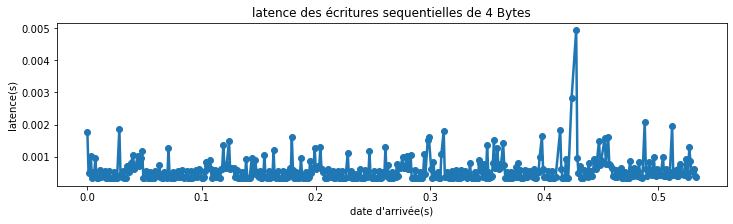

In [71]:
#plot des latences des lectures seq par un pas de 4 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_lat4[:500], y_lat4[:500], "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("latence(s)")
plt.title('latence des écritures sequentielles de 4 Bytes')
plt.savefig("../outplot_fio/write/seq/latence/write4B.png")
plt.show()

In [72]:
#données des lectures seq par une taille de 16 bytes
begin_time_lat16 = df_write_lat_mean[1]["date"][0]
x_lat16 = (df_write_lat_mean[1]["date"] - begin_time_lat16)*ms_to_sec
y_lat16 = (df_write_lat_mean[1]["bw|lat"])*ns_to_sec
y_lat16.tail()

30657    0.000385
30658    0.000852
30659    0.000392
30660    0.000408
30661    0.000416
Name: bw|lat, dtype: float64

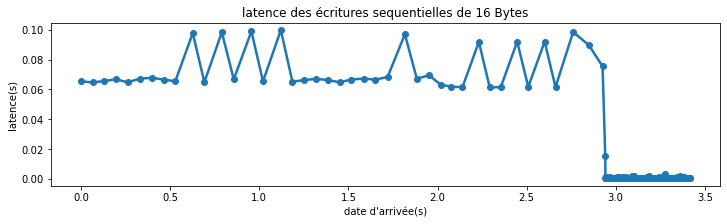

In [73]:
#plot des données des lectures seq par une taille de 16 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_lat16[:500], y_lat16[:500], "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("latence(s)")
plt.title('latence des écritures sequentielles de 16 Bytes')
plt.savefig("../outplot_fio/write/seq/latence/write16B.png")
plt.show()

In [74]:
#données des lectures seq par une taille de 64 bytes
begin_time_lat64 = df_write_lat_mean[2]["date"][0]
x_lat64 = (df_write_lat_mean[2]["date"] - begin_time_lat64)*ms_to_sec
y_lat64 = (df_write_lat_mean[2]["bw|lat"])*ns_to_sec
y_lat64.tail()

7712    0.000497
7713    0.000352
7714    0.000506
7715    0.000653
7716    0.000717
Name: bw|lat, dtype: float64

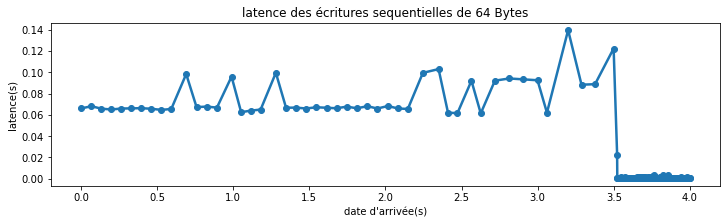

In [75]:
#plot des données des lectures seq par une taille de 64 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_lat64[:500], y_lat64[:500], "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("latence(s)")
plt.title('latence des écritures sequentielles de 64 Bytes')
plt.savefig("../outplot_fio/write/seq/latence/write64B.png")
plt.show()

**Representations graphiques des bandwiths pour les différentes tailles**

In [84]:
#Bandwiths respectivements pour les tailles 4B, 16B, 64B
df_write_bw = [df_write[2], df_write[0],df_write[4]]

In [86]:
# Regrouper les données(bw|lat) qui ont les dates d'arrivées en calcul la moyenne
df_write_bw_mean = [df.groupby(["date"], as_index=False).mean() for df in df_write_bw]
df_write_bw_mean[1].head()

,date,bw|lat,type,taille,offset,prio
0,65,0.0,1.0,16.0,0.0,0.0
1,130,0.0,1.0,16.0,16.0,0.0
2,196,0.0,1.0,16.0,32.0,0.0
3,262,0.0,1.0,16.0,48.0,0.0
4,327,0.0,1.0,16.0,64.0,0.0


In [87]:
#données(bw) des lectures seq par une taille de 4 bytes
begin_time_bw4 = df_write_bw_mean[0]["date"][0]
x_bw4 = (df_write_bw_mean[0]["date"] - begin_time_bw4)*ms_to_sec
y_bw4 = (df_write_bw_mean[0]["bw|lat"])*kib_to_kb
y_bw4.tail()

114958    10.922667
114959    11.264000
114960    10.922667
114961     5.120000
114962    10.581333
Name: bw|lat, dtype: float64

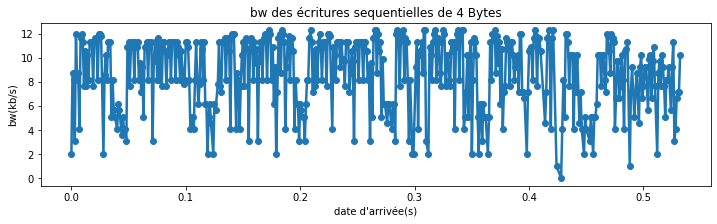

In [88]:
#plot des bw des lectures seq par un pas de 4 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_bw4[:500], y_bw4[:500], "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("bw(kb/s)")
plt.title('bw des écritures sequentielles de 4 Bytes')
plt.savefig("../outplot_fio/write/seq/bw/write4B.png")
plt.show()

In [89]:
#données(bw) des lectures seq par une taille de 16 bytes
begin_time_bw16 = df_write_bw_mean[1]["date"][0]
x_bw16 = (df_write_bw_mean[1]["date"] - begin_time_bw16)*ms_to_sec
y_bw16 = (df_write_bw_mean[1]["bw|lat"])*kib_to_kb
y_bw16.tail()

30655    42.666667
30656    18.432000
30657    41.301333
30658    39.424000
30659    39.424000
Name: bw|lat, dtype: float64

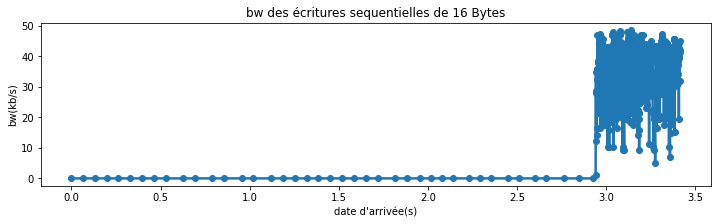

In [90]:
#plot des bw des lectures seq par un pas de 16 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_bw16[:500], y_bw16[:500], "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("bw(kb/s)")
plt.title('bw des écritures sequentielles de 16 Bytes')
plt.savefig("../outplot_fio/write/seq/bw/write16B.png")
plt.show()

In [81]:
#données(bw) des lectures seq par une taille de 64 bytes
begin_time_bw64 = df_write_bw_mean[2]["date"][0]
x_bw64 = (df_write_bw_mean[2]["date"] - begin_time_bw64)*ms_to_sec
y_bw64 = (df_write_bw_mean[2]["bw|lat"])*kib_to_kb
y_bw64.tail()

7712    147.114667
7713    185.856000
7714    130.048000
7715    100.352000
7716    108.544000
Name: bw|lat, dtype: float64

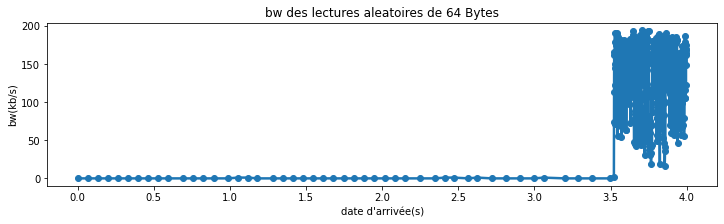

In [82]:
#plot des bw des lectures seq par un pas de 64 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_bw64[:500], y_bw64[:500], "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("bw(kb/s)")
plt.title('bw des lectures aleatoires de 64 Bytes')
plt.savefig("../outplot_fio/write/seq/bw/write64B.png")
plt.show()